In [1]:
import hera_stats as hs
from hera_stats.data import DATA_PATH
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as spstats
import os

/users/drocha/Python/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# First, load data from a pspec container
pc = hs.PSpecContainer(os.path.join(DATA_PATH, "uvp_data.h5"), "rw")
print pc.tree()

(IDR2_1)
  |--zen.grp1.of1.xx.LST.1.08784.uvOCRSDL.h5
  |--zen.grp1.of1.xx.LST.1.18179.uvOCRSDL.h5



In [3]:
# Get UVPSpecs
uvp_list = pc.get_pspec("IDR2_1")
uvp_list

In [4]:
# Split into random antenna groups
spl_ants = hs.jackknives.split_ants(uvp_list, n_jacks=40)
print np.array(spl_ants).shape


uvp 0 and 1 are concatable across blpairts axis
(40, 2)


In [5]:
# Displaying antenna groups that were randomly selected
sp1 = spl_ants[0]
grp1 = sorted(sp1[0].labels)
grp2 = sorted(sp1[1].labels)
print "Group 1 ants: %s \nGroup 2 ants: %s" % (grp1, grp2)

Group 1 ants: [0, 1, 11, 12, 13, 25, 26, 37, 38, 41, 50, 52, 53, 70, 71] 
Group 2 ants: [2, 14, 23, 24, 27, 36, 39, 51, 54, 55, 65, 66, 67, 68, 69]


In [6]:
# Show the number of baseline pairs in each group
blpairs = [s.Nblpairs for s in sp1]

print "Group 1 Nblpairs: %s \nGroup 2 Nblpairs: %s" % tuple(blpairs)

Group 1 Nblpairs: 15 
Group 2 Nblpairs: 15


In [7]:
# Split into striped times
str_times = hs.jackknives.stripe_times(uvp_list)

uvp 0 and 1 are concatable across blpairts axis


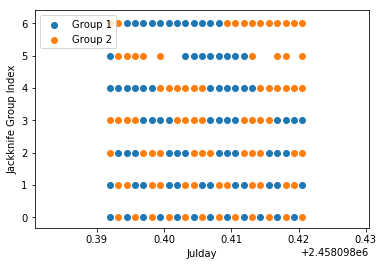

In [8]:
# Plot the time_avg_arrays of each jackknife pair
for y, jack_pair in enumerate(str_times):
    for i, jack in enumerate(jack_pair):
        times = np.unique(jack.time_avg_array)
        plt.scatter(times, y * np.ones(len(times)), color="C%i" % i)
plt.ylabel("Jackknife Group Index")
plt.xlabel("Julday")
patches = [plt.scatter([], [], color="C0"),
           plt.scatter([], [], color="C1")]
plt.legend(patches, ["Group 1", "Group 2"], loc=2)

In [9]:
# Split into Galactic Hour Angle bins
spl_gha = hs.jackknives.split_gha(uvp_list, bins_list=[20])

uvp 0 and 1 are concatable across blpairts axis


In [10]:
sp1 = spl_gha[0]
for i, u in enumerate(sp1):
    grp = u.labels
    print "Group %i gha: %s" % (i, grp)

Group 0 gha: [229.7418155]
Group 1 gha: [229.86601914]
Group 2 gha: [229.95020423]
Group 3 gha: [230.07851321]
Group 4 gha: [230.20882042]
Group 5 gha: [230.29700318]
Group 6 gha: [230.38615463]
Group 7 gha: [230.47626364]
Group 8 gha: [230.61331588]
Group 9 gha: [230.75223225]
Group 10 gha: [230.84607029]
Group 11 gha: [230.94081784]
Group 12 gha: [231.03646659]
Group 13 gha: [231.13300878]
Group 14 gha: [231.23043704]
Group 15 gha: [231.32874439]
Group 16 gha: [231.42792424]
Group 17 gha: [231.52797038]
Group 18 gha: [231.62887695]
Group 19 gha: [231.73063844]


In [11]:
# Omit antenna
omit_ants = hs.jackknives.omit_ants(uvp_list)

uvp 0 and 1 are concatable across blpairts axis


In [12]:
om1 = omit_ants[0]
for i, o in enumerate(om1):
    print "Group %i, Antenna Ommited: %s" % (i, o.labels[0])

Group 0, Antenna Ommited: 0
Group 1, Antenna Ommited: 1
Group 2, Antenna Ommited: 2
Group 3, Antenna Ommited: 11
Group 4, Antenna Ommited: 12
Group 5, Antenna Ommited: 13
Group 6, Antenna Ommited: 14
Group 7, Antenna Ommited: 23
Group 8, Antenna Ommited: 24
Group 9, Antenna Ommited: 25
Group 10, Antenna Ommited: 26
Group 11, Antenna Ommited: 27
Group 12, Antenna Ommited: 36
Group 13, Antenna Ommited: 37
Group 14, Antenna Ommited: 38
Group 15, Antenna Ommited: 39
Group 16, Antenna Ommited: 40
Group 17, Antenna Ommited: 41
Group 18, Antenna Ommited: 50
Group 19, Antenna Ommited: 51
Group 20, Antenna Ommited: 52
Group 21, Antenna Ommited: 53
Group 22, Antenna Ommited: 54
Group 23, Antenna Ommited: 55
Group 24, Antenna Ommited: 65
Group 25, Antenna Ommited: 66
Group 26, Antenna Ommited: 67
Group 27, Antenna Ommited: 68
Group 28, Antenna Ommited: 69
Group 29, Antenna Ommited: 70
Group 30, Antenna Ommited: 71


In [13]:
# Write to container
pc_out = hs.PSpecContainer("uvp_jackknife.h5", "rw")
for jk in [spl_ants, spl_gha, omit_ants, str_times]:
    print "Saving..."
    jk_booted = hs.jackknives.bootstrap_jackknife(jk, "xx")
    hs.jackknives.save_jackknife(pc_out, jk_booted, overwrite=True)

Saving...
Saving...
Saving...
Saving...


In [14]:
pc.save()